Antes de empezar tener instalados los siguientes paquetes:
* https://pgmpy.org/index.html
  
  ```
  pip install pgmpy
  ```

* https://dlsun.github.io/symbulate/index.html
  
  ```
  pip install symbulate
  ```

* http://prob140.org/prob140/
  

  ```
  pip install prob140 --upgrade
  pip install datascience
  ```

* https://www.kaggle.com/code/stephen924/stochastic-processes-and-applications/notebook
* https://github.com/tansora/KyotoUx-009x-Stochastic-Processes-Data-Analysis-and-Computer-Simulation
* https://github.com/martinholub/stochastic-processes-kyotoUx009x
* https://github.com/ryo0921/KyotoUx-009x
* https://github.com/ryo0921/KyotoUx-009x_scratch
* https://github.com/rchanchani/Stochastic-Processes
* https://github.com/Mudit19258/Stochastic-Processes-and-Applications/tree/main/Assignment%201
* https://github.com/EricAgyemang/Stochastic-Processes-Repo
* 

In [70]:
from symbulate import *
import pandas as pd
import itertools
from fractions import Fraction
import matplotlib.pyplot as plt
%matplotlib inline

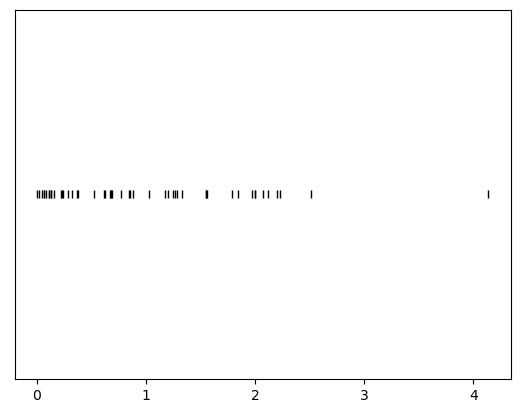

In [6]:
RV(Exponential(rate=1)).sim(50).plot(type="rug")

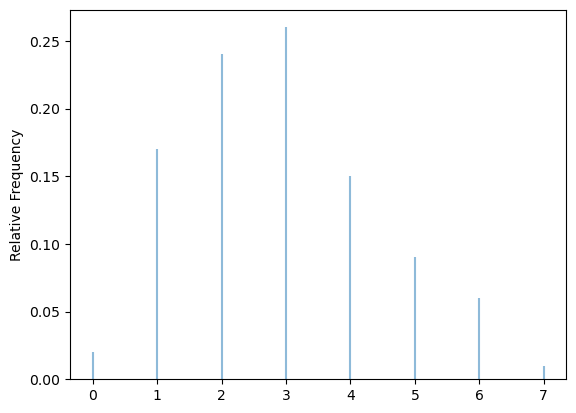

In [9]:
RV(Poisson(3)).sim(100).plot()

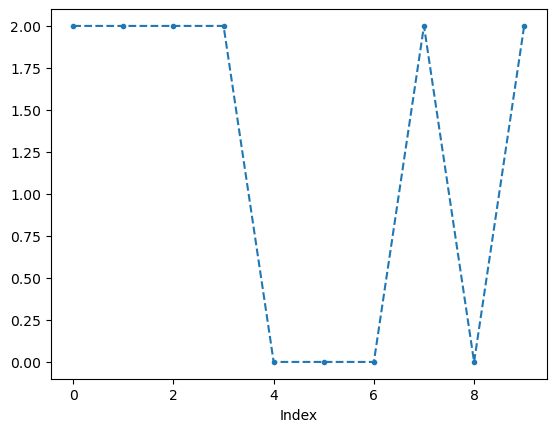

In [10]:
TransitionMatrix = [[0.3, 0.2, 0.5],
                   [0.5, 0.3, 0.2],
                   [0.3, 0.0, 0.7]]

InitialDistribution = [0, 0, 1]

X = MarkovChain(TransitionMatrix, InitialDistribution)

X.sim(1).plot(alpha=1)

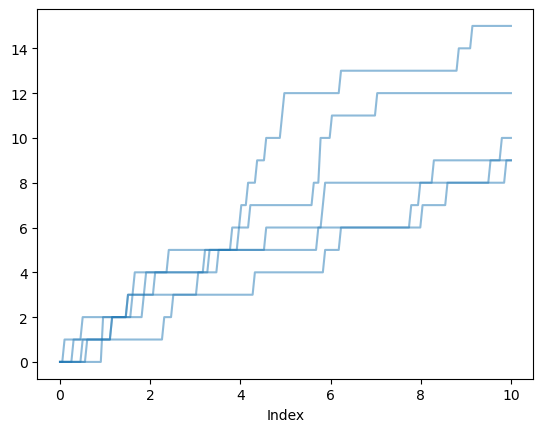

In [11]:
PoissonProcess(rate=1).sim(5).plot(alpha=0.5)

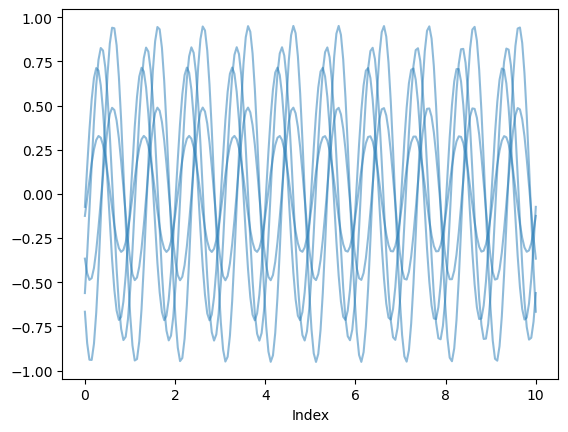

In [14]:
P = (Exponential(1) * Uniform(0, 2 * pi))

def f(omega, t):
    return omega[0] * sin(2 * pi * t + omega[1])

X = RandomProcess(P, Reals(), f)

X.sim(5).plot(alpha=0.5)

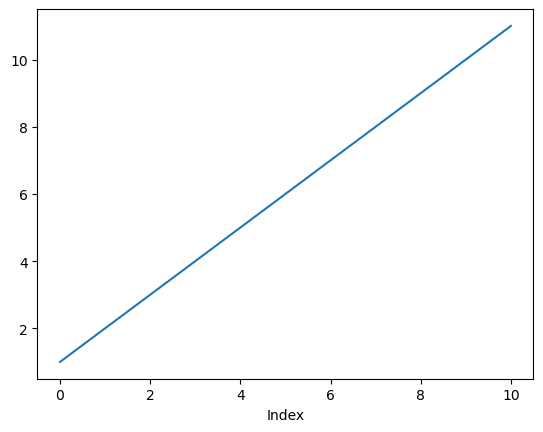

In [18]:
def f(omega, t):
    return omega[0] + omega[1] * t

X = RandomProcess(Bernoulli(0.9) * Bernoulli(0.7), Reals(), f)
X.sim(1).plot(alpha = 1)


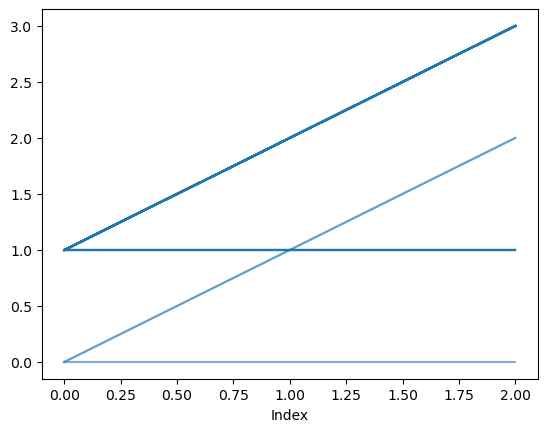

In [19]:
X.sim(100).plot(tmin=0, tmax=2)

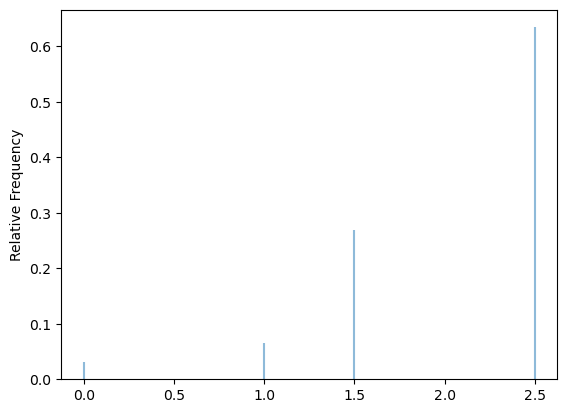

In [20]:
def f(omega, t):
    return omega[0] * t + omega[1]

X = RandomProcess(Bernoulli(0.9) * Bernoulli(0.7), Reals(), f)

X[1.5].sim(10000).plot()

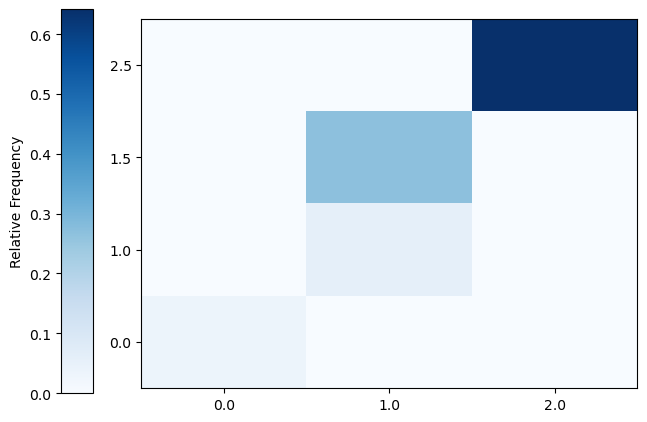

In [21]:
(X[1] & X[1.5]).sim(1000).plot("tile")

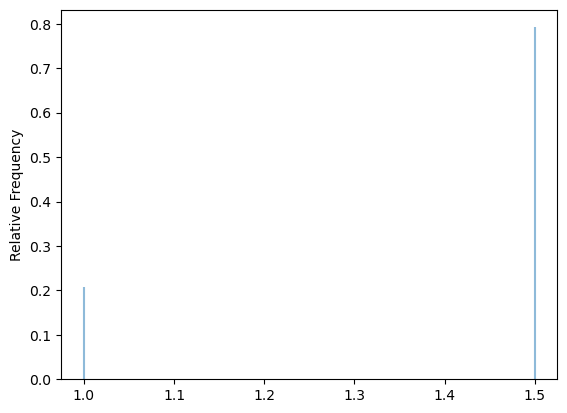

In [22]:

(X[1.5] | (X[1] == 1)).sim(10000).plot()

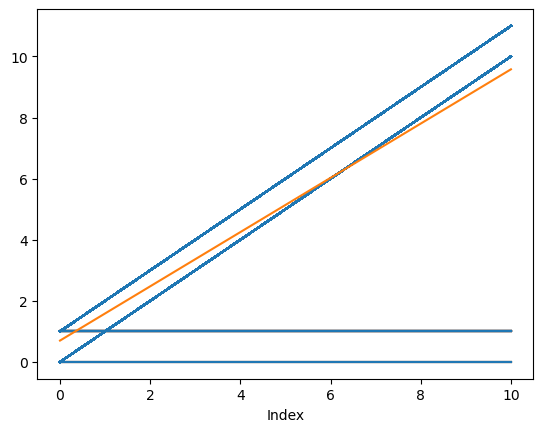

In [23]:
paths = X.sim(1000)
plot(paths)
plot(paths.mean(), 'r')

In [27]:
P = Bernoulli(0.5)**inf
Z = RV(P)
X = RandomProcess(P, DiscreteTimeSequence(fs=1))

X[0] =  0
for n in range(100):
    X[n+1] = X[n] + Z[n+1]

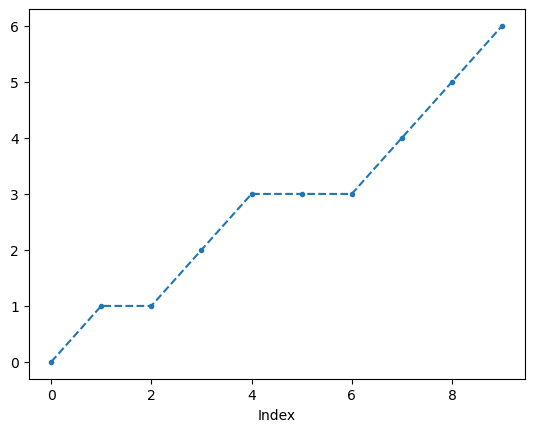

In [28]:
X.sim(1).plot(alpha = 1)

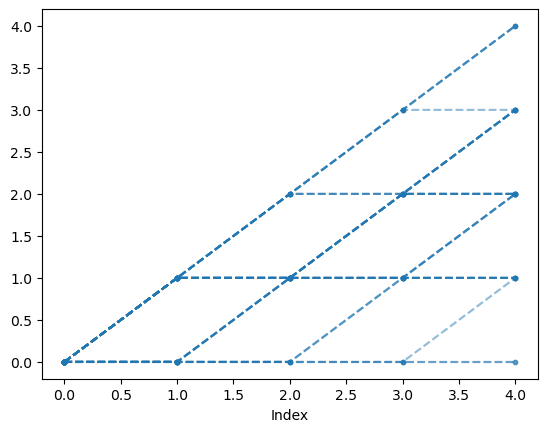

In [29]:
X.sim(100).plot(tmin = 0, tmax = 5)

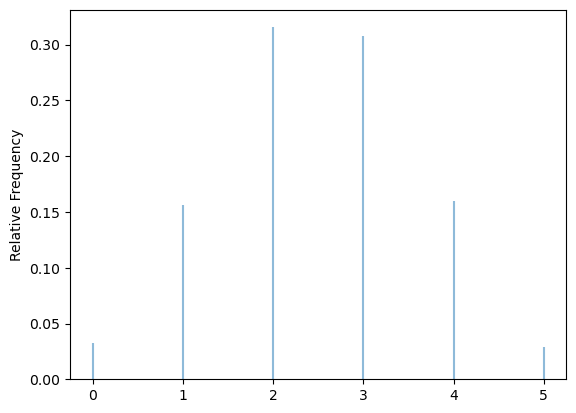

In [30]:
X[5].sim(10000).plot()

https://dlsun.github.io/symbulate/index.html

## Ejemplo 1
Sea $X$ el lanzamiento de una moneda y $Y$ el lanzamiento de un dado:
* Determine $𝑆_𝑋$, $𝑆_𝑌$ y $𝑆_{𝑋𝑌}$
* Dibuje la PMF conjunta ($𝑃_{𝑋𝑌}(𝑥,𝑦)$).
* Si se define un evento $𝐴=\{𝑋+𝑌=3\}$ y $𝐵=\{min⁡(𝑋,𝑌)=1\}$. Encuentre $𝑃[𝐴]$ y $𝑃[𝐵]$


Determine $𝑆_𝑋$, $𝑆_𝑌$ y $𝑆_{𝑋𝑌}$

In [74]:
Sx = [0, 1]   # Rango lanzamiento moneda
Sy = [1, 2, 3, 4, 5, 6]    # Rango lanzamiento de dados
Sxy = list(itertools.product(Sx, Sy))

# https://www.pythoncheatsheet.org/modules/itertools-module
Sx = [0, 1]
print(f"Sx: {Sx}") 
print(f"Sy: {Sy}") 
print(f"Sxy: {Sxy}") 

Sx: [0, 1]
Sy: [1, 2, 3, 4, 5, 6]
Sxy: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]


In [83]:
Px = BoxModel(Sx)
Py = BoxModel(Sy)
PMF = Px * Py
PMF.sim(50000).tabulate(normalize=True) # Simulacion (ley de los grandes numeros)

"(0, 0)",0.16438
"(0, 1)",0.16754
"(0, 2)",0.1683
"(1, 0)",0.16684
"(1, 1)",0.1646
"(1, 2)",0.16834
Total,0.9999999999999999


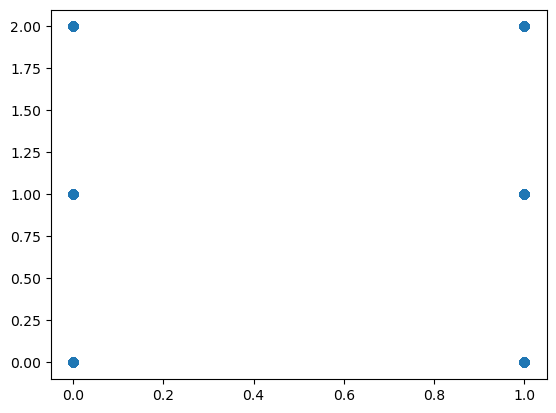

In [84]:
RV(PMF).sim(1000).plot()

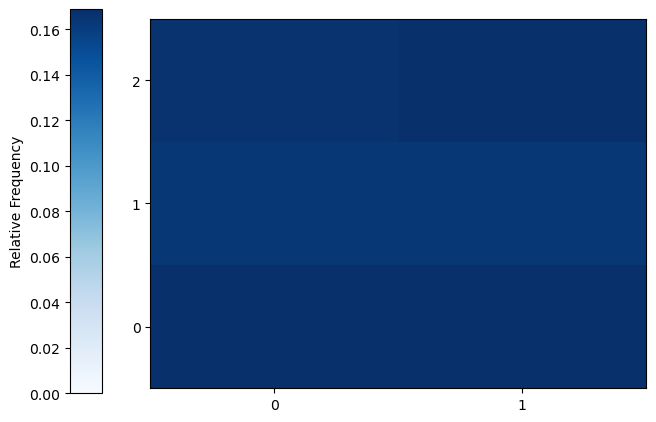

In [85]:
RV(PMF).sim(50000).plot(type="tile")

c:\Users\Usuario\anaconda3\lib\site-packages\symbulate\results.py:579: UserWarning: FixedFormatter should only be used together with FixedLocator
  caxes.set_yticklabels(new_labels)


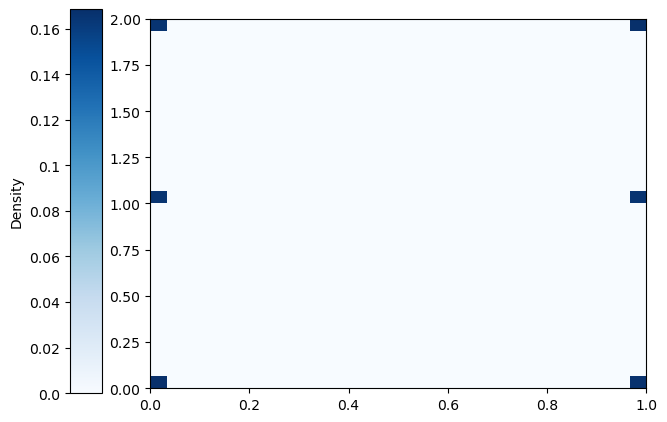

In [86]:
RV(PMF).sim(50000).plot(type="hist")

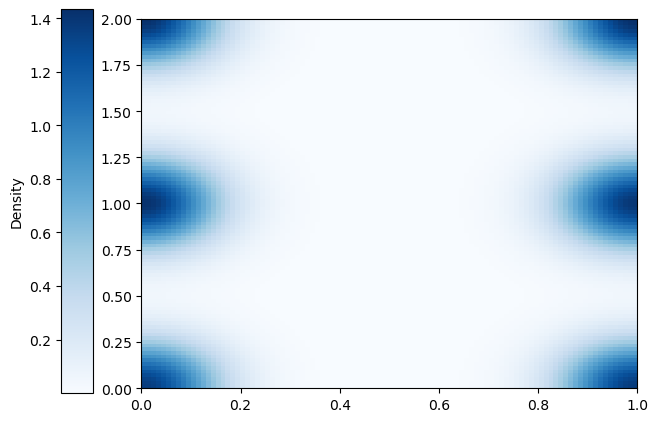

In [87]:
RV(PMF).sim(10000).plot(type="density")

Dibuje la PMF conjunta ($𝑃_{𝑋𝑌}(𝑥,𝑦)$)

In [88]:
# Empty dataframe
PMF_df = pd.DataFrame(columns = Sy, 
                   index = Sx)

# Llenado del dataframe
PMF_df = PMF_df.reset_index()
# print(PMF.index)
# print(PMF.columns)
print()
k = 0

for i in PMF_df.index:
    for j in PMF.columns[1:]:
        PMF_df.loc[i, j] = Fraction(1,len(Sxy))           
        k += 1
PMF_df

AttributeError: 'ProbabilitySpace' object has no attribute 'columns'

Si $𝐴={𝑋+𝑌=3}$ entonces $𝑃[𝐴]$

In [276]:
P_A = 0
for i in PMF.index:
    for j in PMF.columns[1:]:
        # Verificacion del evento (X + Y = 3)
        if (i + j == 3):
            print(f"{i} + {j} = {i + j}")
            P_A += PMF.loc[i, j]
print(f"P(A) = ",P_A, sep="")

0 + 3 = 3
1 + 2 = 3
P(A) = 1/6


Si $𝐵=\{min⁡(𝑋,𝑌)=1\}$ entonces $𝑃[𝐵]$

In [277]:
P_B = 0
for i in PMF.index:
    for j in PMF.columns[1:]:
        # Verificacion del evento (min⁡(𝑋,𝑌)=1)
        if (min(i,j) == 1):
            print(f"min({i} + {j}) = {min(i,j)}")
            P_B += PMF.loc[i, j]
print(f"P(B) = ",P_B, sep="")

min(1 + 1) = 1
min(1 + 2) = 1
min(1 + 3) = 1
min(1 + 4) = 1
min(1 + 5) = 1
min(1 + 6) = 1
P(B) = 1/2


## Ejemplo 2

Considere dos variables aleatorias $𝑋$ y $𝑌$ con un PMF conjunta definida en la siguiente tabla:

|$P_{XY}(x,y)$|$Y=0$|$Y=1$|$Y=2$|
|---|---|---|---|
|**$X=0$**|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|
|**$X=1$**|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

* Determine $𝑆_𝑋$, $𝑆_𝑌$ y $𝑆_{𝑋𝑌}$
* Dibuje la PMF conjunta ($𝑃_{𝑋𝑌}(𝑥,𝑦)$).
* Demuestre que $𝑃[𝑆]=1$
* Encuentre $𝑃(𝑋=0,𝑌 \leq 1)$
* Encuentre las PMFs marginales de $𝑋$ y $𝑌$

In [82]:
X = [0, 0, 0, 1, 1, 1]
Y = [0, 1, 2, 0 , 1, 2]
Pxy = [1/6, 1/4, 1/8, 1/8, 1/6, 1/6]
df2 = pd.DataFrame({"X": X, "Y": Y, "Pxy": Pxy})
print(df2)
table2 = pd.pivot_table(df2, index=["X"], columns=["Y"], values=["Pxy"])
print()
print(table2)
print()
Sx = list(set(X))
print(f"Sx: {Sx}")
Sy = list(set(Y))
print(f"Sy: {Sy}")
Sxy = list(itertools.product(Sx, Sy))
print(f"Sxy: {Sxy}")


   X  Y       Pxy
0  0  0  0.166667
1  0  1  0.250000
2  0  2  0.125000
3  1  0  0.125000
4  1  1  0.166667
5  1  2  0.166667

        Pxy                    
Y         0         1         2
X                              
0  0.166667  0.250000  0.125000
1  0.125000  0.166667  0.166667

Sx: [0, 1]
Sy: [0, 1, 2]
Sxy: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]


In [89]:
Pxy = [1/6, 1/4, 1/8, 1/8, 1/6, 1/6]
PMF = BoxModel(Sxy,probs=Pxy)

In [92]:
RV(PMF).sim(50000).tabulate(normalize=True)

"(0, 0)",0.1674
"(0, 1)",0.24942
"(0, 2)",0.12412
"(1, 0)",0.12642
"(1, 1)",0.16718
"(1, 2)",0.16546
Total,1.0


c:\Users\Usuario\anaconda3\lib\site-packages\symbulate\results.py:579: UserWarning: FixedFormatter should only be used together with FixedLocator
  caxes.set_yticklabels(new_labels)


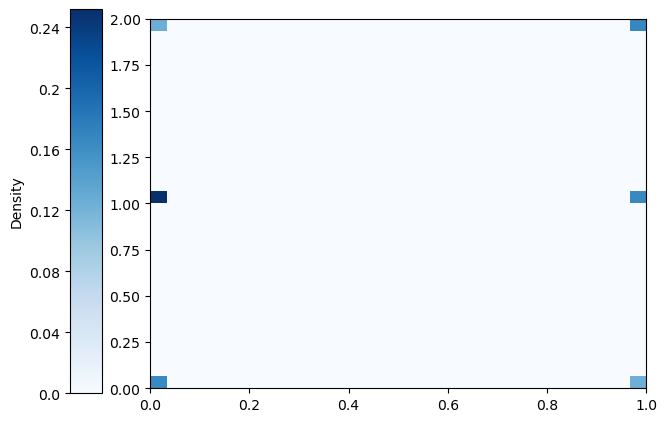

In [94]:
RV(PMF).sim(50000).plot(type="hist")

Text(8.222222222222223, 0.5, 'X')

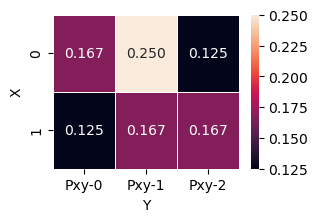

In [280]:
f, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(table2, annot=True, fmt=".3f", linewidths=.5, ax=ax)
ax.set_xlabel("Y")
ax.set_ylabel("X")

In [281]:
P_S = sum(table2.sum())
print(f"P(S) = {P_S}")

P(S) = 0.9999999999999999


In [282]:
# Evento X = 0 and Y < 1
P_A = 0
for i in table2.index:
    for j in table2.columns:
        # print(i)
        # print(j[1:][0])
        if(i==0 and j[1:][0] <= 1): 
            print(f"i = {i}; j = {j[1:][0]}")
            P_A += table2.iloc[i][j]
print(f"P[A] = {P_A:.3f}")

i = 0; j = 0
i = 0; j = 1
P[A] = 0.417


In [283]:
P_X = np.zeros(2)
for i in table2.index:
    P_X[i] = table2.iloc[i].sum()
print(f"P_X = {P_X}")

P_X = [0.54166667 0.45833333]


In [284]:
P_Y = table2.sum().to_numpy()
print(f"P_Y = {P_Y}")

P_Y = [0.29166667 0.41666667 0.29166667]


## Ejemplo 3

Una gran agencia de seguros presta servicios a numerosos clientes que han adquirido tanto una póliza de propietario de casa como una póliza de automóvil en la agencia. Por cada tipo de póliza, se debe especificar una cantidad deducible. Para una póliza de automóvil, las opciones son $100 y $250, mientras que para la póliza de propietario de casa, las opciones son 0, $100 y $200. 

Suponga que se selecciona al azar un individuo con ambos tipos de póliza de los archivos de la agencia. 
* Determine las variables aleatorias asociadas al ejemplo.
* Halle el rango de cada una de las variables.
* Suponga que la tabla de probabilidad conjunta se muestra a continuación:
  
  |$P_{XY}(x,y)$|$Y=0$|$Y=100$|$Y=200$|
  |---|---|---|---|
  |**$X=100$**|$0.20$|$0.10$|$0.20$|
  |**$X=250$**|$0.05$|$0.15$|$0.30$|
  
  Luego, a partir de esta determine: 
  * La probabilidad de deducir $100 sobre ambas pólizas.
  * La probabilidad de que se deduzca mas de $100 sobre la segunda póliza.
  * La PFM de X
  * La PFM de Y

**Variables aleatorias**:
* X = la cantidad deducible sobre la póliza del auto
* Y = la cantidad deducible sobre la póliza de la casa

In [285]:
# Rango de las variables aleatorias
Sx = [100, 250]
Sy = [0, 100, 200]
Sxy = list(itertools.product(Sx,Sy))
print(f"Sx: {Sx}") 
print(f"Sy: {Sy}") 
print(f"Sxy: {Sxy}") 

Sx: [100, 250]
Sy: [0, 100, 200]
Sxy: [(100, 0), (100, 100), (100, 200), (250, 0), (250, 100), (250, 200)]


In [286]:
X = []
Y = []
for j in Sy:
    for i in Sx:
        X.append(i)
        Y.append(j)
# print(X)
# print(Y)
Pxy = [0.20, 0.05, 0.10, 0.15, 0.20, 0.30]
df3 = pd.DataFrame({"X": X, "Y": Y, "Pxy": Pxy})
print(df3)
table3 = pd.pivot_table(df3, index=["X"], columns=["Y"], values=["Pxy"])
print()
print(table3)
print()

     X    Y   Pxy
0  100    0  0.20
1  250    0  0.05
2  100  100  0.10
3  250  100  0.15
4  100  200  0.20
5  250  200  0.30

      Pxy           
Y     0     100  200
X                   
100  0.20  0.10  0.2
250  0.05  0.15  0.3



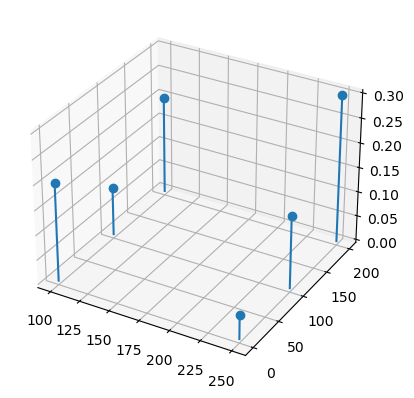

In [287]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
(markerline, stemlines, baseline) = ax.stem(X,Y,Pxy)
plt.setp(baseline, visible=False)
plt.show()

Text(8.222222222222221, 0.5, 'X')

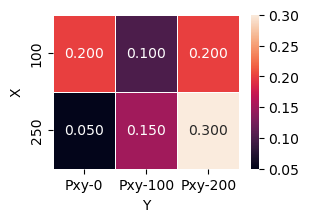

In [298]:
f, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(table3, annot=True, fmt=".3f", linewidths=.5, ax=ax)
ax.set_xlabel("Y")
ax.set_ylabel("X")

In [289]:
# Probabilidad de deducir 100 sobre ambas polizas: Evento X = 100 and Y = 100
P_A = 0

result = df3.query('X==100 & Y ==100')
P_A = sum(result['Pxy'])
print(f"P[A] = {P_A:.3f}")

P[A] = 0.100


In [290]:
# La probabilidad de que se deduzca $100 o mas sobre la segunda póliza: Evento Y >= 100
P_B = 0

result = df3.query('Y>=100')
P_B = sum(result['Pxy'])
print(f"P[B] = {P_B:.3f}")

P[B] = 0.750


In [291]:
# PFM de X
P_X = np.zeros(len(Sx))
for i in range(len(Sx)):
    P_X[i] = table3.iloc[i].sum()
    i += 1
    
print(f"P_X = {P_X}") # Crear un dataframe con X como indice (pendiente)

P_X = [0.5 0.5]


In [292]:
# PFM de Y
P_Y = table3.sum().to_numpy()
print(f"P_Y = {P_Y}") # Crear un dataframe con Y como indice (pendiente)

P_Y = [0.25 0.25 0.5 ]


## Ejemplo 4
Test two integrated circuits one after the other. On each test, the possible outcomes are $a$ ($accept$) and $r$ ($reject$). Assume that all circuits are acceptable with probability 0.9 and that the outcomes of successive tests are independent. Count the number of acceptable circuits $X$ and count the number of successful tests $Y$ before you observe the first reject. (If both tests are successful, let $Y = 2$). 
* Find the sample space of the experiment.
* Draw a tree diagram for the experiment.
* Find the VAs related with the experiment.
* Find the joint PMF of X and Y


Espacio muestran del experimento: $𝑆=\{𝑎𝑎,𝑎𝑟,𝑟𝑎,𝑟𝑟\}$:
* $P(aa) = P(a) \cdot P(a) = (0.9)(0.9) = 0.81$
* $P(ar) = P(a) \cdot P(r) = (0.9)(0.1) = 0.09$
* $P(ar) = P(r) \cdot P(a) = (0.1)(0.9) = 0.09$
* $P(ar) = P(r) \cdot P(r) = (0.9)(0.9) = 0.01$

Por otro lado las variables aleatorias $X$ y $Y$ se definen como:
* X = the number of acceptable circuits.
* Y = the number of successful tests before you observe the first reject.

De modo que:
* $S_X = {0,1,2}$
* $S_Y = {0,1,2}$

Luego tenemos que:

* $P(aa) = P(X=2,Y=2) = 0.81$
* $P(ar) = P(X=1,Y=1) = 0.09$
* $P(ra) = P(X=1,Y=0) = 0.09$
* $P(rr) = P(X=0,Y=0) = 0.01$

Vemos ademas que en terminos de estas VA, los casos que no aparecen es por que tienen probabilidad cero:
* P(X=1,Y=2) = 0$
* P(X=2,Y=1) = 0$

De modo que la PFM quedará como:

  |$P_{XY}(x,y)$|$Y=0$|$Y=1$|$Y=2$|
  |---|---|---|---|
  |**$X=0$**|$0.01$|$0$|$0$|
  |**$X=1$**|$0.09$|$0.09$|$0$|
  |**$X=2$**|$0$|$0$|$0.81$|



In [293]:
# Rango de las variables aleatorias
Sx = [0, 1, 2]
Sy = [0, 1, 2]
Sxy = list(itertools.product(Sx,Sy))
print(f"Sx: {Sx}") 
print(f"Sy: {Sy}") 
print(f"Sxy: {Sxy}") 

Sx: [0, 1, 2]
Sy: [0, 1, 2]
Sxy: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [294]:
X = []
Y = []
for j in Sy:
    for i in Sx:
        X.append(i)
        Y.append(j)
Pxy = [0.01, 0.09, 0, 0, 0.09, 0, 0, 0, 0.81]
df4 = pd.DataFrame({"X": X, "Y": Y, "Pxy": Pxy})
print(df4)
table4 = pd.pivot_table(df4, index=["X"], columns=["Y"], values=["Pxy"])
print()
print(table4)
print()

   X  Y   Pxy
0  0  0  0.01
1  1  0  0.09
2  2  0  0.00
3  0  1  0.00
4  1  1  0.09
5  2  1  0.00
6  0  2  0.00
7  1  2  0.00
8  2  2  0.81

    Pxy            
Y     0     1     2
X                  
0  0.01  0.00  0.00
1  0.09  0.09  0.00
2  0.00  0.00  0.81



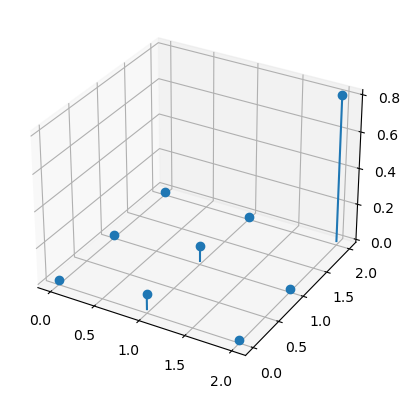

In [299]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
(markerline, stemlines, baseline) = ax.stem(X,Y,Pxy)
plt.setp(baseline, visible=False)
plt.show()

Text(8.222222222222223, 0.5, 'X')

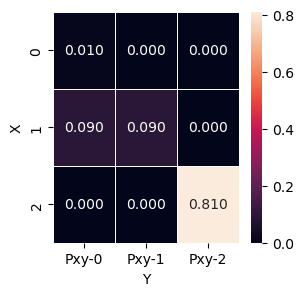

In [297]:
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(table4, annot=True, fmt=".3f", linewidths=.5, ax=ax)
ax.set_xlabel("Y")
ax.set_ylabel("X")

En esta parte vamos a instalar la libreria: https://pgmpy.org/index.html
```
pip install pgmpy
```

Otro paquete seria el siguiente: https://dlsun.github.io/symbulate/index.html




https://dlsun.github.io/symbulate/joint.html

## Referencias
1. https://www.probabilitycourse.com/
2. https://probability4datascience.com/index.html
3. http://prob140.org/textbook/content/Chapter_04/00_Relations_Between_Variables.html
4. https://github.com/norvig/pytudes#pytudes-index-of-jupyter-ipython-notebooks
5. https://stanford-cs221.github.io/spring2020/
6. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/flipping.ipynb
7. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/poker.ipynb
8. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/Coin%20Flip.ipynb
9. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/ProbabilitySimulation.ipynb
10. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/ProbabilityParadox.ipynb
11. https://colab.research.google.com/github/norvig/pytudes/blob/main/ipynb/Probability.ipynb
12. https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Prob_Distributions_Discrete.ipynb
13. https://github.com/aimacode/aima-python/blob/master/probability4e.ipynb
14. https://github.com/statistics-exercises
15. https://www.geeksforgeeks.org/matplotlib-pyplot-matshow-in-python/
16. https://inferentialthinking.com/chapters/06/Tables.html
17. http://www.data8.org/datascience/tutorial.html


## Referencias 2

1. https://dlsun.github.io/symbulate/joint.html
2. https://pgmpy.org/index.html